In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Explore

In [3]:
%matplotlib inline 
#쥬피터노트북에 바로 결과를 띄워주세요
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#이 수업의 목표는 화면에 나오는걸 잘 이해하고, 스스로 실습할 수 있고 최종적으로 현업에서 DSientist로서 홀로설 수 있도록 실력을 키우는게 목표
#수업에서 모든 데이터와 모든 분석을 보여주지 않음.
# 분석하지 않은 컬럼들은 알아서 분석해라.

### Dates

In [5]:
train['Dates'].dtypes
# 'O'는 문자열이란 뜻. object

train['Dates'] = pd.to_datetime(train['Dates'])
train.dtypes



Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [6]:
# train['Dates'] = pd.to_datetime(train['Dates'])
#
train['Dates-year'] = train['Dates'].dt.year
train['Dates-month'] = train['Dates'].dt.month
train['Dates-day'] = train['Dates'].dt.day
train['Dates-hour'] = train['Dates'].dt.hour
train['Dates-minute'] = train['Dates'].dt.minute
train['Dates-second'] = train['Dates'].dt.second

train.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


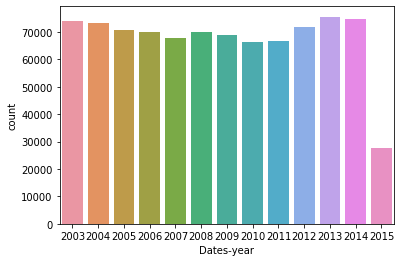

In [7]:
sns.countplot(data=train, x='Dates-year')

#스크롤 위아래로 내리면서 보기 불편하기 때문에 한번에 띄워준다.

'시각화 팁: 머릿속으로 결과 출력 전에 결과가 어떻게 시각화로 나올지 상상을 해보고, \n실제 결과가 나오면 그 차이를 한눈에 볼 수 있고 인사이트를 얻을 수 있음.\n예를들면 연도 시각화면, 범죄 발생과 연도는 큰 영향은 없을 것임.\n아마도 y축의 길이가 거의 비슷할 것임. \n그런데 현재 시각화 결과 2015년만 수가 적으면, 왜 그런지 직접 분석해봐야함.\n\nEDA의 목적은 머신러닝 알고리즘을 어떻게 더 개선할 수 있을 것인지 생각하는 것임.\n'

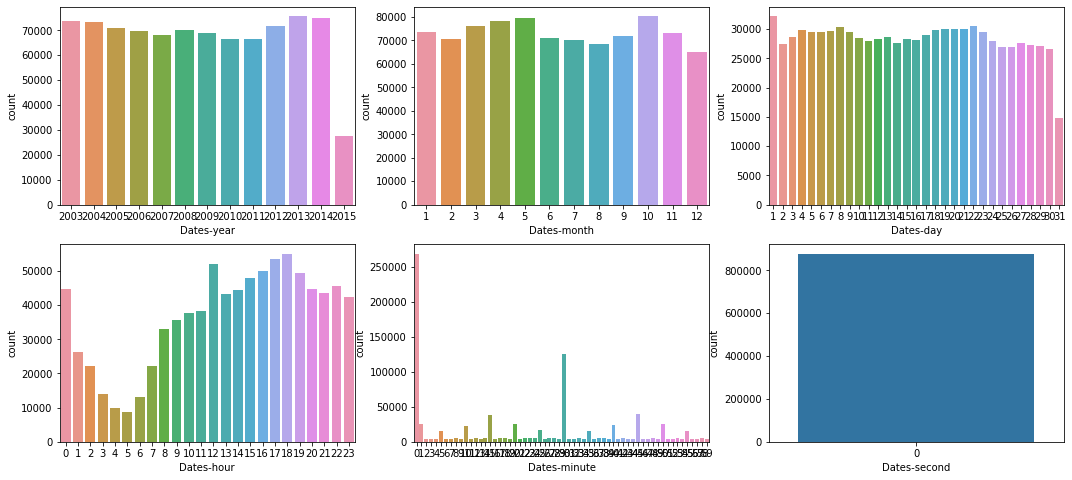

In [8]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x='Dates-year', ax = ax1)
sns.countplot(data=train, x='Dates-month', ax = ax2)
sns.countplot(data=train, x='Dates-day', ax = ax3)
sns.countplot(data=train, x='Dates-hour', ax = ax4)
sns.countplot(data=train, x='Dates-minute', ax = ax5)
sns.countplot(data=train, x='Dates-second', ax = ax6)

'''시각화 팁: 머릿속으로 결과 출력 전에 결과가 어떻게 시각화로 나올지 상상을 해보고, 
실제 결과가 나오면 그 차이를 한눈에 볼 수 있고 인사이트를 얻을 수 있음.
예를들면 연도 시각화면, 범죄 발생과 연도는 큰 영향은 없을 것임.
아마도 y축의 길이가 거의 비슷할 것임. 
그런데 현재 시각화 결과 2015년만 수가 적으면, 왜 그런지 직접 분석해봐야함.

EDA의 목적은 머신러닝 알고리즘을 어떻게 더 개선할 수 있을 것인지 생각하는 것임.
'''

### X, Y

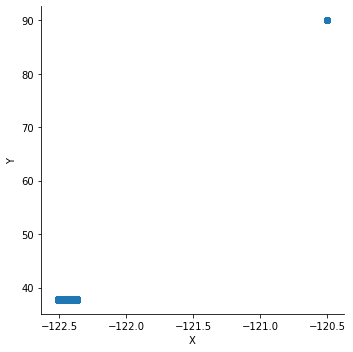

In [9]:
# train[['X', 'Y']]

sns.lmplot(data=train, x = "X", y = "Y", fit_reg = False)
#fit-reg는 추세선 그리는거. 이번거는 데이터가 많아서 시간이 오래걸리기때문에, False로 설정
#기대한 결과와는 다른데, 좌하단 또는 우상단은 아웃라이어일 가능성 높음. 데이터 사이즈로 봤을때 우상단 가능성 높음


In [10]:
train["X"].max(), train["Y"].max()
#위치데이터가 정수처럼 보여지는값은 조금 이상함.

(-120.5, 90.0)

In [11]:
X_outliers = (train['X'] == train['X'].max())
Y_outliers = (train['Y'] == train['Y'].max())

outlier = train[X_outliers & Y_outliers]

print(outlier.shape)
outlier
# 80만개중에 67개 정도는 아웃라이어로 봐도될듯... 이 67개를 고치는건 머신러닝 알고리즘을 바꾸는데 큰 도움이 되지 않을 것이므로 후순위
# 아마 Address가 잘못적혀있어서 XY값도 이상한곳으로 된게아닌지.... googlemap으로 확인해보면 짐작할 수 있음
# Address 검색하고 우클릭 -> What's here? 선택하면 알수있음



(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,11,8,49,0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,9,9,25,0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,2003,5,2,1,0,0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,2003,4,14,16,30,0


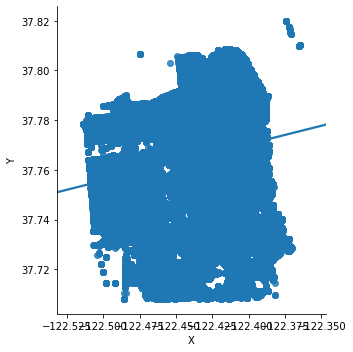

In [12]:
non_outliers = train[~(X_outliers & Y_outliers)]

sns.lmplot(data=non_outliers, x = 'X', y = "Y", fit_reg = True)
#좌표정보 자세히 보고 싶으면 scatterplot 추천

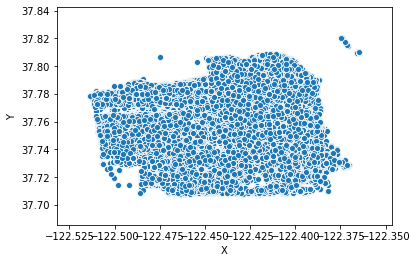

In [13]:
sns.scatterplot(data=non_outliers, x = 'X', y = "Y")
#특정지역에 어느범죄가 일어난다 -> 범죄분류 정보 추가하면 더 자세한 분석 가능

# Lv2. 

## Load Dataset

In [36]:
import pandas as pd

In [37]:
train = pd.read_csv('train.csv')

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [38]:
test = pd.read_csv('test.csv', index_col = 'Id')

print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Train

### One hot encoding


In [39]:
# #제일 쉬운 방법
# train['DayOfWeek_Monday'] = train['DayOfWeek'] == 'Monday'
# train['DayOfWeek_Tuesday'] = train['DayOfWeek'] == 'Tuesday'
# train['DayOfWeek_Wednesday'] = train['DayOfWeek'] == 'Wednesday'
# train['DayOfWeek_Thursday'] = train['DayOfWeek'] == 'Thursday'
# train['DayOfWeek_Friday'] = train['DayOfWeek'] == 'Friday'
# train['DayOfWeek_Saturday'] = train['DayOfWeek'] == 'Saturday'
# train['DayOfWeek_Sunday'] = train['DayOfWeek'] == 'Sunday'

# print(train.shape)
# train.head()

In [40]:
dayofweek_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for dayofweek in dayofweek_list:
    column = "DayOfWeek_" + dayofweek
    train[column] = train['DayOfWeek'] == dayofweek

#제일 쉬운 방법
# train['DayOfWeek_Monday'] = train['DayOfWeek'] == 'Monday'
# train['DayOfWeek_Tuesday'] = train['DayOfWeek'] == 'Tuesday'
# train['DayOfWeek_Wednesday'] = train['DayOfWeek'] == 'Wednesday'
# train['DayOfWeek_Thursday'] = train['DayOfWeek'] == 'Thursday'
# train['DayOfWeek_Friday'] = train['DayOfWeek'] == 'Friday'
# train['DayOfWeek_Saturday'] = train['DayOfWeek'] == 'Saturday'
# train['DayOfWeek_Sunday'] = train['DayOfWeek'] == 'Sunday'

print(train.shape)
train.head()

(878049, 16)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,False,True,False,False,False,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,False,True,False,False,False,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,False,False,True,False,False,False,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,False,False,True,False,False,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,False,False,True,False,False,False,False


In [41]:
train_dayofweek = pd.get_dummies(train['DayOfWeek'], prefix = "DayOfWeek")
#자동으로 one hot encoding해주는 명령어 get_dummies
train_dayofweek

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
878044,0,1,0,0,0,0,0
878045,0,1,0,0,0,0,0
878046,0,1,0,0,0,0,0
878047,0,1,0,0,0,0,0


In [42]:
# train = pd.concat([train, train_dayofweek], axis = 1)

# print(train.shape)
# train.head()

##코드는 간결한데 문제가 있음. 코드실행할때마다 계속 concat됨.(한번만 실행해야됨)

In [43]:
dayofweek_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for dayofweek in dayofweek_list:
    column = "DayOfWeek_" + dayofweek
    test[column] = test['DayOfWeek'] == dayofweek

In [44]:
train_pddistrict = pd.get_dummies(train['PdDistrict'], prefix = "PdDistrict")

train = pd.concat([train, train_pddistrict], axis = 1)

print(train.shape)
train.head()

(878049, 26)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,False,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,False,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,False,...,0,0,0,0,0,1,0,0,0,0


In [45]:
test_pddistrict = pd.get_dummies(test['PdDistrict'], prefix = "PdDistrict")

test = pd.concat([test, test_pddistrict], axis = 1)

print(test.shape)
test.head()

(884262, 23)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0


In [46]:
train['Dates'] = pd.to_datetime(train['Dates'])

train['Dates-year'] = train['Dates'].dt.year
train['Dates-month'] = train['Dates'].dt.month
train['Dates-day'] = train['Dates'].dt.day
train['Dates-hour'] = train['Dates'].dt.hour
train['Dates-minute'] = train['Dates'].dt.minute
train['Dates-second'] = train['Dates'].dt.second

train.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeek_Monday,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,0,0,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,0,0,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,False,...,0,0,0,0,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,False,...,0,0,0,0,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,False,...,0,0,0,0,2015,5,13,23,30,0


In [47]:
test['Dates'] = pd.to_datetime(test['Dates'])

test['Dates-year'] = test['Dates'].dt.year
test['Dates-month'] = test['Dates'].dt.month
test['Dates-day'] = test['Dates'].dt.day
test['Dates-hour'] = test['Dates'].dt.hour
test['Dates-minute'] = test['Dates'].dt.minute
test['Dates-second'] = test['Dates'].dt.second

test.head()


,Dates,DayOfWeek,PdDistrict,Address,X,Y,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
Id,,,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,False,False,False,False,...,0,0,0,0,2015,5,10,23,59,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,False,False,False,False,...,0,0,0,0,2015,5,10,23,51,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,False,False,False,False,...,0,0,0,0,2015,5,10,23,50,0
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,False,...,0,0,0,0,2015,5,10,23,45,0
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,False,False,False,False,...,0,0,0,0,2015,5,10,23,45,0


In [48]:
feature_names = ['X', 'Y']
feature_names = feature_names + ['Dates-year', 'Dates-month', 'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second']
feature_names = feature_names + ['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday']

feature_names = feature_names + list(train_pddistrict.columns)

feature_names

['X',
 'Y',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute',
 'Dates-second',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [49]:
train_dayofweek.columns

Index(['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday'],
      dtype='object')

In [126]:
# feature_names

x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(878049, 26)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Crossroad
0,-122.425892,37.774599,2015,5,13,23,53,0,False,False,...,0,0,0,1,0,0,0,0,0,True
1,-122.425892,37.774599,2015,5,13,23,53,0,False,False,...,0,0,0,1,0,0,0,0,0,True
2,-122.424363,37.800414,2015,5,13,23,33,0,False,False,...,0,0,0,1,0,0,0,0,0,True
3,-122.426995,37.800873,2015,5,13,23,30,0,False,False,...,0,0,0,1,0,0,0,0,0,False
4,-122.438738,37.771541,2015,5,13,23,30,0,False,False,...,0,0,0,0,1,0,0,0,0,False


In [127]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(884262, 26)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Crossroad
Id,,,,,,,,,,,,,,,,,,,,,
0,-122.399588,37.735051,2015,5,10,23,59,0,False,False,...,0,0,0,0,0,0,0,0,0,False
1,-122.391523,37.732432,2015,5,10,23,51,0,False,False,...,0,0,0,0,0,0,0,0,0,True
2,-122.426002,37.792212,2015,5,10,23,50,0,False,False,...,0,0,0,1,0,0,0,0,0,False
3,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,0,1,0,0,0,0,0,0,0,False
4,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,0,1,0,0,0,0,0,0,0,False


In [128]:
label_name = 'Category'
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### Use Random Forest

In [53]:
#트리를 여러개 만들어서 섞어쓰는 방법

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10,
                              n_jobs = -1, #코어를 전부 쓰기때문에 실행속도가 빨라짐
                              random_state = 37) #랜덤한 값을 고정해준다. 아무 숫자나 넣어도됨.

model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [60]:
%time model.fit(x_train, y_train) 
#랜덤포레스트가 알아서 학습하면서 예측할 수 있는 모델을 만들기 시작한다.
#학습할때 몇초걸렸는지 알려줌

Wall time: 19.7 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
model.predict(x_test)

#어떤 범죄인지 알 수 있음.

array(['OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', ...,
       'EXTORTION', 'LARCENY/THEFT', 'LARCENY/THEFT'], dtype=object)

In [ ]:

#수업에서는 _proba 명령어를 추가해서 범죄가 일어날 각각의 확률을 계산
#캐글에서 이렇게 제출해주기를 원함.
prediction_list = model.predict_proba(x_test) #proba = 범죄가 일어날 확률로 알려줌 캐글이 이런 데이터 형태로 제출하길 원함

print(prediction_list.shape)
prediction_list

In [129]:
from lightgbm import LGBMClassifier

In [130]:
model = LGBMClassifier(n_estimators = 10,
                       random_state = 37)
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [131]:
%time model.fit(x_train, y_train) 
#랜덤포레스트가 알아서 학습하면서 예측할 수 있는 모델을 만들기 시작한다.
#학습할때 몇초걸렸는지 알려줌

Wall time: 20.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [132]:
model.predict(x_test)

#어떤 범죄인지 알 수 있음.

array(['LARCENY/THEFT', 'OTHER OFFENSES', 'LARCENY/THEFT', ...,
       'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT'], dtype=object)

In [ ]:
#test를 위해 한번에 다 집어넣었지만 실제로는 feature에 하나하나 넣어봐서 cross - evaluation 체크

In [133]:

#수업에서는 _proba 명령어를 추가해서 범죄가 일어날 각각의 확률을 계산
#캐글에서 이렇게 제출해주기를 원함.
prediction_list = model.predict_proba(x_test) #proba = 범죄가 일어날 확률로 알려줌 캐글이 이런 데이터 형태로 제출하길 원함

print(prediction_list.shape)
prediction_list

(884262, 39)


array([[0.00183637, 0.13347113, 0.00033377, ..., 0.04256967, 0.05923475,
        0.01507741],
       [0.0012955 , 0.07390694, 0.00029777, ..., 0.03883151, 0.06073789,
        0.01717339],
       [0.00161086, 0.09830538, 0.00034505, ..., 0.04087488, 0.04849942,
        0.00919504],
       ...,
       [0.00145876, 0.08196315, 0.00055677, ..., 0.07498343, 0.03050009,
        0.0085127 ],
       [0.00161145, 0.07844361, 0.00055381, ..., 0.07353478, 0.03219577,
        0.00843876],
       [0.00130023, 0.0655356 , 0.01849788, ..., 0.06683448, 0.02718544,
        0.00733616]])

## Submit

In [29]:
sample_submission = pd.read_csv('sampleSubmission.csv', index_col = 'Id')

In [30]:
submission = pd.DataFrame(prediction_list,
                              index = sample_submission.index,
#                               columns = sample_submission.columns
                             columns = model.classes_) # 샘플 파일의 컬럼명. 예측모델대로 하고싶으면 columns = model.classes_로 바꿈

print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.088098,0.0,0.0,0.000000,0.000000,0.000000,0.032852,0.00000,0.029211,...,0.0,0.00000,0.0,0.095305,0.0,0.000000,0.152210,0.223770,0.142409,0.000000
1,0.0,0.103751,0.0,0.0,0.000000,0.000000,0.004104,0.052227,0.00000,0.000000,...,0.0,0.00000,0.0,0.025692,0.0,0.002606,0.007048,0.064073,0.094149,0.013652
2,0.0,0.082732,0.0,0.0,0.224696,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.00000,0.0,0.062187,0.0,0.000000,0.138730,0.190732,0.000000,0.000000
3,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349
4,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349


In [31]:
model.classes_


array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [32]:
submission.to_csv('baseline-script.csv')
#용량이 크기때문에 압축해서 캐글에 올리는걸 추천

In [33]:
#score는 낮을수록 좋은거. 높은수록 안좋은거이므로 0점대로 만드는걸 목표로 해야함.

### model validation

1. Hold-out validation

데이터를 8:2로 나눈뒤 큰 조각을 train데이터로, 작은 조각을 test데이터로 가정한다.



2. Cross validation

2000개씩 5조각을 낸뒤, 조각을뺀 나머지로 알고리즘 학습하고, 조각을 예측한다.

## Evaluate

In [134]:
from sklearn.model_selection import train_test_split

x_train_kf, x_test_kf, y_train_kf, y_test_kf = train_test_split(x_train, y_train, test_size = 0.3, random_state = 37)
#random_stage에 임의의숫자를 넣으면 랜덤으로 나눠진 값들에대해 결과가 조금씩 달라지는걸 방지할 수 있다.
#test_size에 0.2를 넣으먼 8:2, 0.3을 넣으면 7:3으로 쪼개짐
print(x_train_kf.shape, y_train_kf.shape)
print(x_test_kf.shape, y_test_kf.shape)


(614634, 26) (614634,)
(263415, 26) (263415,)


In [135]:
%time model.fit(x_train_kf, y_train_kf)  # 70%의 데이터를 넣음

Wall time: 17.5 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [136]:
model.predict(x_test_kf)

array(['LARCENY/THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', ...,
       'LARCENY/THEFT', 'LARCENY/THEFT', 'LARCENY/THEFT'], dtype=object)

In [137]:
y_test_predict_kf = model.predict_proba(x_test_kf)

print(y_test_predict_kf.shape)
y_test_predict_kf

(263415, 39)


array([[0.00173111, 0.09952009, 0.00039018, ..., 0.04301549, 0.06206305,
        0.01028962],
       [0.00157303, 0.07964371, 0.00051761, ..., 0.07026049, 0.03321099,
        0.00719912],
       [0.00147839, 0.08129824, 0.00037014, ..., 0.04253911, 0.05480795,
        0.01090934],
       ...,
       [0.00157435, 0.06287822, 0.00037061, ..., 0.18751191, 0.03191083,
        0.00695435],
       [0.00255876, 0.09332428, 0.00064123, ..., 0.05252421, 0.04127978,
        0.00973551],
       [0.00155115, 0.08877186, 0.00045316, ..., 0.06852462, 0.05149861,
        0.01034328]])

In [138]:
y_test_kf

42015      LARCENY/THEFT
325724    SUSPICIOUS OCC
419657     DRUG/NARCOTIC
455358           ASSAULT
276196      NON-CRIMINAL
               ...      
329991     LARCENY/THEFT
196548     LARCENY/THEFT
873964     LARCENY/THEFT
343791     LARCENY/THEFT
865106    MISSING PERSON
Name: Category, Length: 263415, dtype: object

y_test_predict_kf와 y_test_kf를 비교한다
두개가 일치할수록 좋은거고, 일치하지않으면 안좋은거.

일치하는지 판단하는 방법은 보통 kaggle에서 제시해주는 공식을 쓴다. 이번에는 캐글에서 제시한 log_loss라는 공식을 씀.

In [139]:
from sklearn.metrics import log_loss
#사이킷런이라고 읽음

score = log_loss(y_test_kf, y_test_predict_kf)

print("Log Loss = {:.5f}".format(score))
#소수점 5째짜리만 띄움.
#낮을수록 좋음
#캐글에 일일이 제출하지않고 우리의 모델이 괜찮은지를 검증하는(validation)방법


Log Loss = 2.51624


In [70]:
submission = pd.DataFrame(prediction_list,
                              index = sample_submission.index,
                              columns = sample_submission.columns)

submission

NameError: name 'prediction_list' is not defined

## 3주차 수업

log_loss에 대한 부연설명

$$
log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})
$$

In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


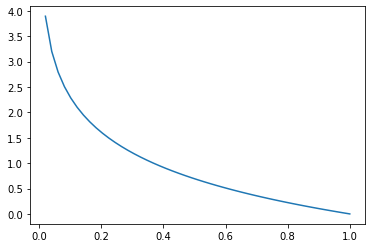

In [74]:
xx = np.linspace(start = 0.0, stop = 1.0)
yy = -1.0 * np.log(xx)

plt.plot(xx, yy)

낮을수록 좋고, 높을수록 안좋음. 

In [76]:
pd.read_csv('sampleSubmission.csv', index_col = "Id").head(3)

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


logloss 공식의 N은 세로, M은 가로 y는 정답
y는 정답이기 때문에 0 또는 1값만 가짐
log(pij)는 확률
y가 1일때, '정답인 값만 보겠다'는 뜻


In [77]:
actual = np.array([1,0,0])

predict = np.array([0.5, 0.2, 0.3])

actual, predict

(array([1, 0, 0]), array([0.5, 0.2, 0.3]))

In [78]:
actual * predict #predict는 무시하겠다는뜻

array([0.5, 0. , 0. ])

In [79]:
actual * np.log(predict) #predict는 무시하겠다는뜻

array([-0.69314718, -0.        , -0.        ])

In [82]:
-1.0*(actual * np.log(predict))#predict는 무시하겠다는뜻

array([0.69314718, 0.        , 0.        ])

In [83]:
np.sum(-1.0*(actual * np.log(predict))/1)#predict는 무시하겠다는뜻

0.6931471805599453

In [84]:
actual = [
    [1,0,0],
    [0,0,1],
    [0,1,0]
]

actual = np.array(actual)

actual

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [87]:
predict = [
    [0.5, 0.2, 0.3],
    [0.2, 0.2, 0.6],
    [0.2, 0.7, 0.1],
    
]

predict = np.array(predict)

np.sum((-1.0*(actual * np.log(predict)))/len(predict))

#log는 틀리면 틀릴수록 값이 기하급수적으로 올라간다

0.5202159160882228

In [88]:
train['Category'].value_counts()
#범죄빈도가 낮을수록 중범죄, 빈번하게 발생하면 경범죄인 특성이 있음
#절도와 살인의 범죄를 같게 봐야하나?

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [91]:
train['Category(predict)'] = train['Category'].copy()

print(train.shape)
train[['Category', 'Category(predict)']].head()

(878049, 33)


,Category,Category(predict)
0,WARRANTS,WARRANTS
1,OTHER OFFENSES,OTHER OFFENSES
2,OTHER OFFENSES,OTHER OFFENSES
3,LARCENY/THEFT,LARCENY/THEFT
4,LARCENY/THEFT,LARCENY/THEFT


In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['Category'])

actual = encoder.transform(train["Category"])
actual

array([37, 21, 21, ..., 16, 35, 12])

In [95]:
predict = encoder.transform(train["Category(predict)"])
predict

array([37, 21, 21, ..., 16, 35, 12])

In [97]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [102]:
predict = np.eye(39)[predict]
predict

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
from sklearn.metrics import log_loss

log_loss(actual, predict) #매우정확함

3.881903860748282e-14

In [106]:
#일부러 TREA를 경범죄로 다 바꿈

train.loc[train['Category'] == 'TREA', 'Category(predict)'] = 'LARCENY/THEFT'

train.loc[train['Category'] == 'TREA', ['Category', 'Category(predict)']]

,Category,Category(predict)
21002,TREA,LARCENY/THEFT
93716,TREA,LARCENY/THEFT
107733,TREA,LARCENY/THEFT
192190,TREA,LARCENY/THEFT
316490,TREA,LARCENY/THEFT
337880,TREA,LARCENY/THEFT


In [107]:
predict = encoder.transform(train["Category(predict)"])
predict

array([37, 21, 21, ..., 16, 35, 12])

In [108]:
predict = np.eye(39)[predict]
predict

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
log_loss(actual, predict, eps = 1e-15) 

#생각보단 정확도가 높게나옴 
#eps는 min,max 설정, log_loss는 상위 자주발생하는 범죄를 맞추는게 더 중요. 

0.00023601491306698033

# log_loss 낮추기 => EDA 했던 내용을 개선하기

## Address

In [115]:
train['Crossroad'] = train['Address'].str.contains('/')

print(train.shape)
train[['Address', 'Crossroad']]

(878049, 34)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False
...,...,...
878044,FARALLONES ST / CAPITOL AV,True
878045,600 Block of EDNA ST,False
878046,5TH ST / FOLSOM ST,True
878047,TOWNSEND ST / 2ND ST,True


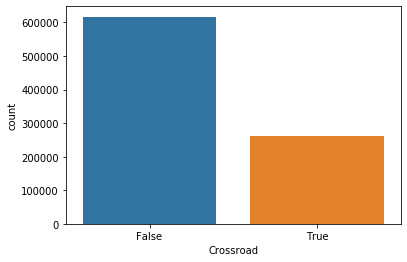

In [116]:
sns.countplot(data=train, x = 'Crossroad')

In [ ]:
#범죄발생이 crossroad인게 연관이 있나?

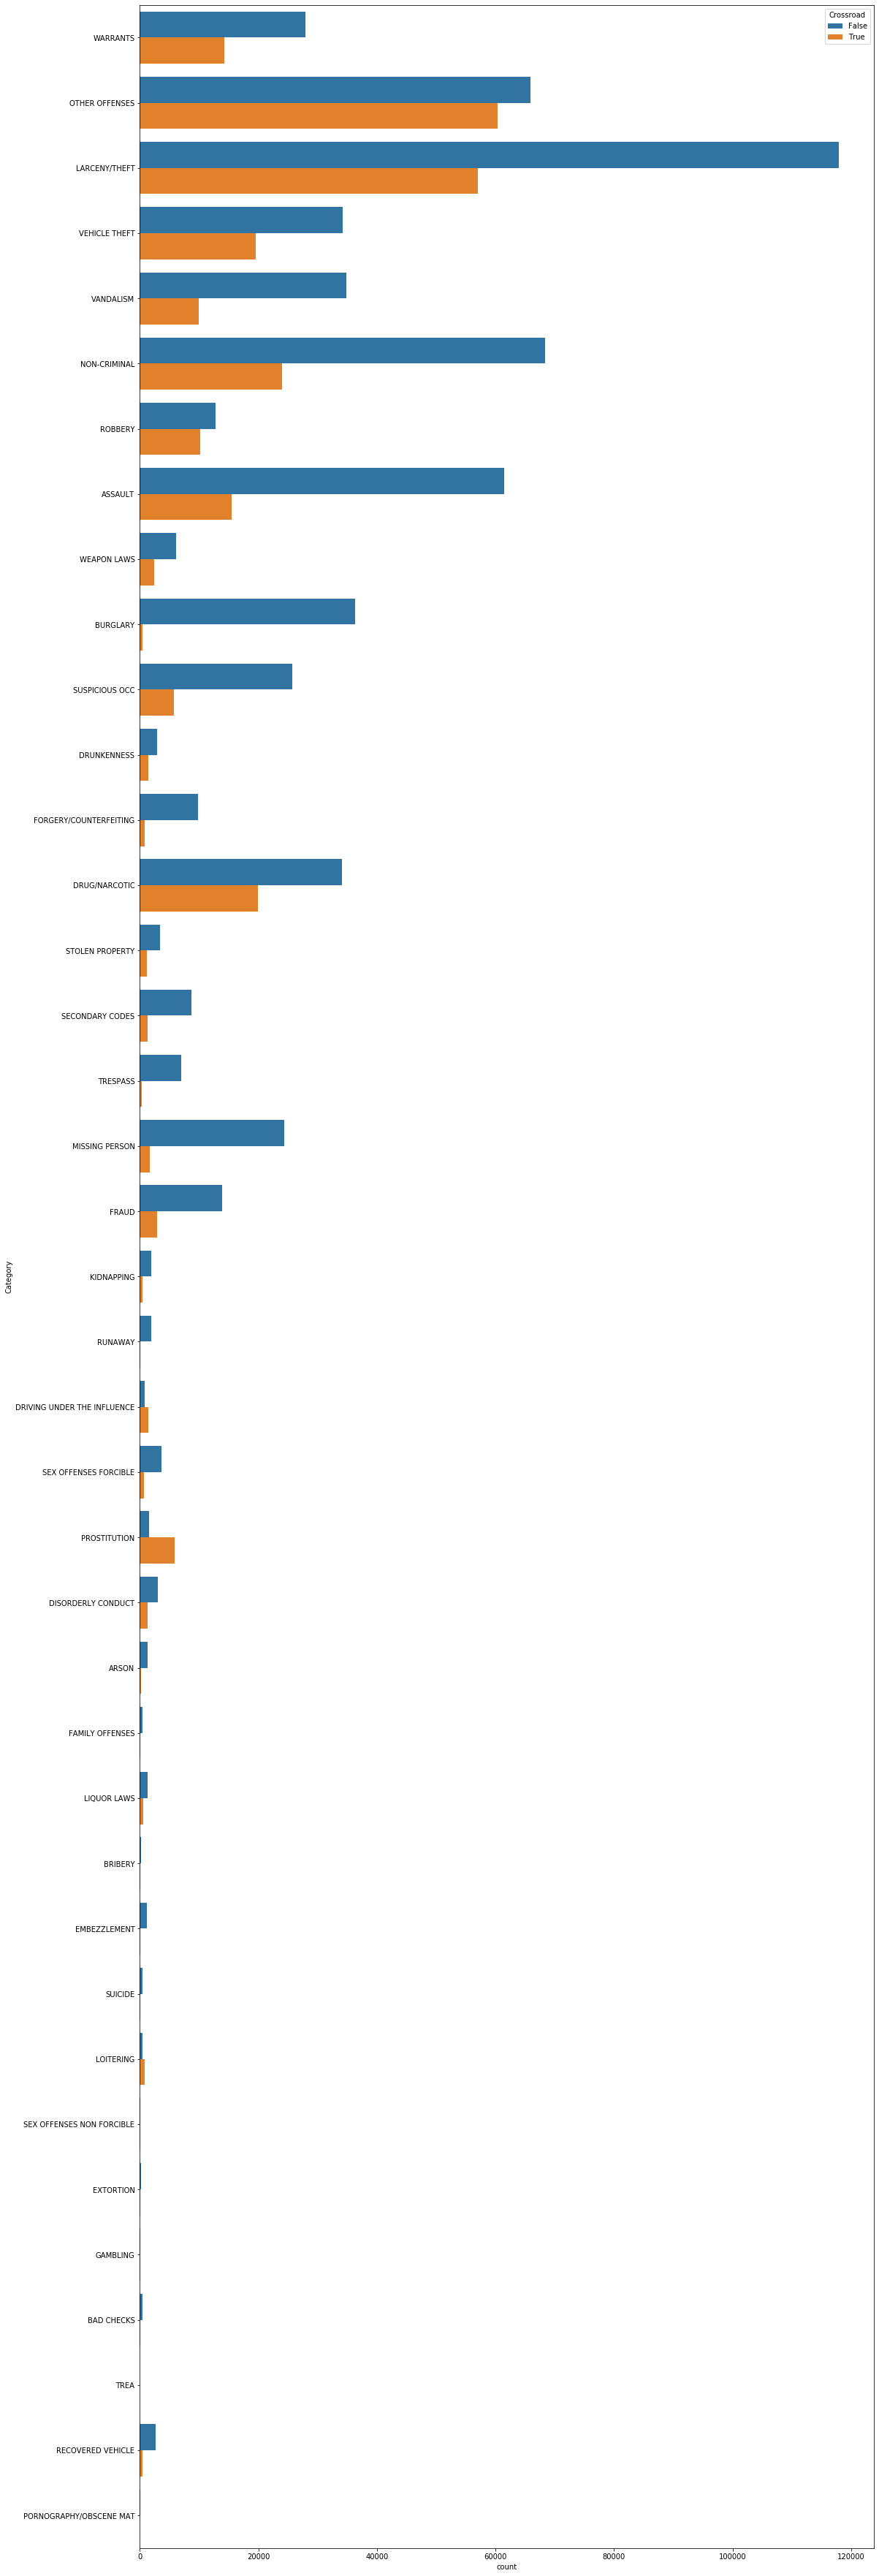

In [119]:
plt.figure(figsize = (18, 64))
sns.countplot(data=train, hue = 'Crossroad', y = 'Category')

In [ ]:
#그래프를 보니 범죄에 따라 case가 조금씩 다름 => Crossroad를 넣으면 머신러닝 향상에 도움이 되겠다.

In [120]:
train['Address']

0                 OAK ST / LAGUNA ST
1                 OAK ST / LAGUNA ST
2          VANNESS AV / GREENWICH ST
3           1500 Block of LOMBARD ST
4          100 Block of BRODERICK ST
                     ...            
878044    FARALLONES ST / CAPITOL AV
878045          600 Block of EDNA ST
878046            5TH ST / FOLSOM ST
878047          TOWNSEND ST / 2ND ST
878048      1800 Block of NEWCOMB AV
Name: Address, Length: 878049, dtype: object

In [122]:
train.head(2)
#같은 지역, 같은 요일, 같은 시간인데 범죄 카테고리만 다름 =
#=> 동시발생 사건이다

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeek_Monday,...,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Category(predict),Crossroad
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,2015,5,13,23,53,0,WARRANTS,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,2015,5,13,23,53,0,OTHER OFFENSES,True


In [ ]:
#multi label classificatio 을 감안해서 머신러닝 알고리즘 향상 가능


In [123]:
test['Crossroad'] = test['Address'].str.contains('/')

print(test.shape)
test[['Address', 'Crossroad']]

(884262, 30)


,Address,Crossroad
Id,,
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False
...,...,...
884257,2600 Block of BRYANT ST,False
884258,1900 Block of WASHINGTON ST,False
884259,5500 Block of MISSION ST,False


In [125]:
feature_names = feature_names + ['Crossroad']

In [ ]:
### 반복해보고, log_loss 산출

## Dates_minute

In [142]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeek_Monday,...,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Category(predict),Crossroad
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,2015,5,13,23,53,0,WARRANTS,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,False,...,0,0,2015,5,13,23,53,0,OTHER OFFENSES,True
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,False,...,0,0,2015,5,13,23,33,0,OTHER OFFENSES,True
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,False,...,0,0,2015,5,13,23,30,0,LARCENY/THEFT,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,False,...,0,0,2015,5,13,23,30,0,LARCENY/THEFT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,True,...,1,0,2003,1,6,0,15,0,ROBBERY,True
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,True,...,0,0,2003,1,6,0,1,0,LARCENY/THEFT,False
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,True,...,0,0,2003,1,6,0,1,0,LARCENY/THEFT,True
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,True,...,0,0,2003,1,6,0,1,0,VANDALISM,True


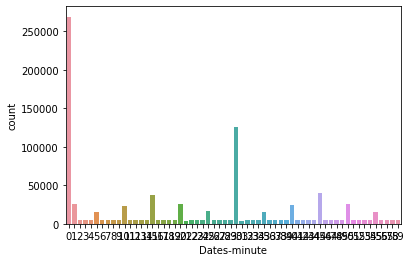

In [143]:
sns.countplot(data = train, x = 'Dates-minute')

In [147]:
import numpy as np

train['Dates-minute(abs)'] = np.abs(train['Dates-minute'] - 30)
test['Dates-minute(abs)'] = np.abs(test['Dates-minute'] - 30)

In [148]:
print(train.shape)
train[['Dates-minute', 'Dates-minute(abs)']].head()

(878049, 35)


,Dates-minute,Dates-minute(abs)
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0


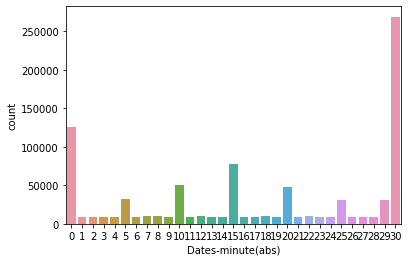

In [149]:
sns.countplot(data = train, x = 'Dates-minute(abs)')
#데이터를 합쳐주는 효과가 있음

In [ ]:
## abs로바꿔서 log_loss측정해보고 값이 낮아졌으면 결과가 좀더 좋아졌다는뜻